In [10]:
pip install lazypredict

In [11]:
import pandas as pd

df = pd.read_csv('cannula_data.csv')

print(df)


    No.  Order No.  Article No.   Drawing  Bright Annealing  Sinking  \
0     1   14389927      15323759   360.40            107.40   385.60   
1     2   14389217      15325226   384.70            102.60   387.30   
2     3   14389820      15325218   391.10             99.20   375.60   
3     4   14388649      15325220   383.80            106.60   387.70   
4     5   14388570      15325218   392.60            115.00   396.80   
..  ...        ...           ...      ...               ...      ...   
95   96   14389722      15325221   377.44            177.72   390.23   
96   97   14389945      15325222   384.25            160.63   385.09   
97   98   14389828      15325221   418.41            188.91   413.28   
98   99   14389526      15325222   396.78            196.79   371.83   
99  100   14389578      15325221   347.26            189.11   345.72   

    Electro Fission  Distorted or Not  
0            387.70                 1  
1            390.70                 1  
2            39

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df.drop(['No.','Order No.','Article No. '], axis=1, inplace=True)

In [14]:
df.shape

(100, 5)

In [15]:
df.head()

,Drawing,Bright Annealing,Sinking,Electro Fission,Distorted or Not
0,360.4,107.4,385.6,387.7,1
1,384.7,102.6,387.3,390.7,1
2,391.1,99.2,375.6,391.0,1
3,383.8,106.6,387.7,394.1,1
4,392.6,115.0,396.8,396.0,1


In [16]:
print(df)

    Drawing  Bright Annealing  Sinking  Electro Fission  Distorted or Not
0    360.40            107.40   385.60           387.70                 1
1    384.70            102.60   387.30           390.70                 1
2    391.10             99.20   375.60           391.00                 1
3    383.80            106.60   387.70           394.10                 1
4    392.60            115.00   396.80           396.00                 1
..      ...               ...      ...              ...               ...
95   377.44            177.72   390.23           409.92                 0
96   384.25            160.63   385.09           382.29                 0
97   418.41            188.91   413.28           413.70                 0
98   396.78            196.79   371.83           371.05                 0
99   347.26            189.11   345.72           383.51                 0

[100 rows x 5 columns]


In [17]:
df['Distorted or Not'].value_counts()

,count
Distorted or Not,
1,50
0,50


In [18]:
df.isnull().sum()

,0
Drawing,0
Bright Annealing,0
Sinking,0
Electro Fission,0
Distorted or Not,0


In [19]:
X = df.drop(['Distorted or Not'], axis=1)

y = df['Distorted or Not']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
X_train.shape, X_test.shape

((70, 4), (30, 4))

In [22]:
X_train.dtypes

,0
Drawing,float64
Bright Annealing,float64
Sinking,float64
Electro Fission,float64


In [23]:
X_train.head()

,Drawing,Bright Annealing,Sinking,Electro Fission
11,391.60,116.50,395.40,411.60
47,379.20,113.40,384.40,390.30
85,389.81,156.34,403.58,399.09
28,348.80,103.40,389.20,398.70
93,354.62,127.08,426.54,415.46


In [24]:
X_test.head()

,Drawing,Bright Annealing,Sinking,Electro Fission
83,389.37,161.38,419.54,390.12
53,371.20,174.20,362.40,366.30
70,421.60,145.09,392.08,405.55
45,366.30,114.90,382.10,393.00
44,357.90,102.40,385.30,399.40


In [25]:
print(X_train.columns)

Index(['Drawing', 'Bright Annealing', 'Sinking', 'Electro Fission'], dtype='object')


In [26]:
X_train.head()

,Drawing,Bright Annealing,Sinking,Electro Fission
11,391.60,116.50,395.40,411.60
47,379.20,113.40,384.40,390.30
85,389.81,156.34,403.58,399.09
28,348.80,103.40,389.20,398.70
93,354.62,127.08,426.54,415.46


In [27]:
X_train.dtypes

,0
Drawing,float64
Bright Annealing,float64
Sinking,float64
Electro Fission,float64


In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

print('Your Model have accuracy score of : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Your Model have accuracy score of : 1.0000


In [29]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, y_train)

y_pred_100 = rfc_100.predict(X_test)


print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 1.0000


In [30]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
Bright Annealing,0.737737
Sinking,0.122230
Electro Fission,0.120317
Drawing,0.019715


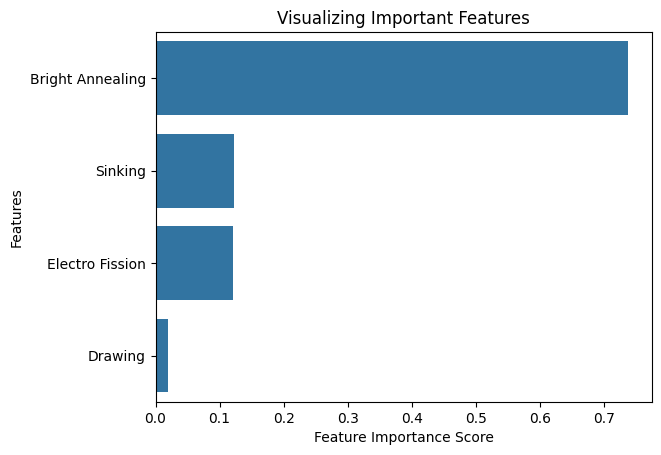

In [32]:
sns.barplot(x=feature_scores, y=feature_scores.index)




plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



plt.title("Visualizing Important Features")


plt.show()

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision Score (for each class)
precision = precision_score(y_test, y_pred, average='macro')  # Use 'micro', 'macro', or 'weighted' for multi-class
print(f"Precision: {precision:.4f}")

# Recall Score (for each class)
recall = recall_score(y_test, y_pred, average='macro')  # Use 'micro', 'macro', or 'weighted' for multi-class
print(f"Recall: {recall:.4f}")

# F1 Score (for each class)
f1 = f1_score(y_test, y_pred, average='macro')  # Use 'micro', 'macro', or 'weighted' for multi-class
print(f"F1 Score: {f1:.4f}")

# Classification Report (includes precision, recall, F1 score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# ROC AUC (only for binary classification tasks)
# You need probability scores for this metric, so you should use the predict_proba() method
# For binary classification:
if len(set(y_test)) == 2:  # Check if the problem is binary classification
    y_prob = rfc.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"\nROC AUC: {roc_auc:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[13  0]
 [ 0 17]]

ROC AUC: 1.0000


In [34]:
input_data = (394.7,112.7,403.4,410.8)

prediction = rfc.predict([input_data])

if prediction[0] == 0:
    print("The cannula is not distorted.")
else:
    print("The cannula is distorted.")

The cannula is distorted.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
import pickle

In [36]:
filename = 'saved_steps.pkl'
pickle.dump(rfc,open(filename,'wb'))